<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Matías López
- Nombre de alumno 2: José Saffie


### **Link de repositorio de GitHub:** `https://github.com/JoseSaffie/MDS7202-1-Primavera-2023`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)



,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [2]:
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f'Valores únicos en {columna}: {valores_unicos}')

Valores únicos en Age: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Valores únicos en Sex: [1. 0.]
Valores únicos en HighChol: [0. 1.]
Valores únicos en CholCheck: [1. 0.]
Valores únicos en BMI: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Valores únicos en Smoker: [0. 1.]
Valores únicos en HeartDiseaseorAttack: [0. 1.]
Valores únicos en PhysActivity: [1. 0.]
Valores únicos en Fruits: [0. 1.]
Valores únicos en Veggies: [1. 0.]
Valores únicos en HvyAlcoholConsump: [0. 1.]
Valores únicos en GenHlth: [3. 1. 2. 4. 5.]
Valores únicos en MentHlth: [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
Valores únicos en PhysHlth: [30.  0

## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?. 

In [3]:
#!pip install xgboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [4]:
# Inserte su código aquí

X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Lo hacemos a mano la categorizacion, a traves de un print anterior de todos los valores unicos por columna distinguimos aquellos que son numericos y categoricos
numeric_features = ['BMI', 'MentHlth','PhysHlth']
categorical_features_listas = ['Sex','HighChol',	'CholCheck',	'Smoker'	,'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies'	,'HvyAlcoholConsump'		,'DiffWalk'	,'Stroke'	,'HighBP']
categorical_features = ['Age','GenHlth']
#print(categorical_features)


# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('c2', OneHotEncoder(), categorical_features),
        ('c1', 'passthrough', categorical_features_listas)
        
    ]
      # Conserva las características no especificadas)
)

# Crear el pipeline con el preprocesador y el clasificador XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo (incluida la división de datos)
pipeline.fit(X_train, y_train)


# Probamos el modelo

from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?.

Lo primero fue hacer un one hot encoding, pero habian varias columnas listas , por lo que le hacemos cambio solo a algunas

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [5]:
datos_antes = pipeline.named_steps['preprocessor']

data_transformed = preprocessor.fit_transform(df)
print(data_transformed)
# Obtén los nombres de las columnas transformadas
column_names = preprocessor.get_feature_names_out()

# Convierte los nombres de las columnas a una lista
column_names_list = column_names.tolist()
print(column_names_list)

[[-0.54217564  0.15301974  2.40400793 ...  0.          0.
   1.        ]
 [-0.54217564 -0.46005828 -0.57745057 ...  0.          1.
   1.        ]
 [-0.54217564 -0.46005828  0.41636893 ...  0.          0.
   0.        ]
 ...
 [-0.68274544  1.37917577 -0.57745057 ...  1.          0.
   1.        ]
 [-1.66673405 -0.46005828 -0.57745057 ...  1.          0.
   1.        ]
 [-0.68274544 -0.46005828 -0.57745057 ...  0.          0.
   1.        ]]
['num__BMI', 'num__MentHlth', 'num__PhysHlth', 'c2__Age_1.0', 'c2__Age_2.0', 'c2__Age_3.0', 'c2__Age_4.0', 'c2__Age_5.0', 'c2__Age_6.0', 'c2__Age_7.0', 'c2__Age_8.0', 'c2__Age_9.0', 'c2__Age_10.0', 'c2__Age_11.0', 'c2__Age_12.0', 'c2__Age_13.0', 'c2__GenHlth_1.0', 'c2__GenHlth_2.0', 'c2__GenHlth_3.0', 'c2__GenHlth_4.0', 'c2__GenHlth_5.0', 'c1__Sex', 'c1__HighChol', 'c1__CholCheck', 'c1__Smoker', 'c1__HeartDiseaseorAttack', 'c1__PhysActivity', 'c1__Fruits', 'c1__Veggies', 'c1__HvyAlcoholConsump', 'c1__DiffWalk', 'c1__Stroke', 'c1__HighBP']


In [6]:
for indice, elemento in enumerate(column_names_list):
    print(f"Posición {indice }: {elemento}")

Posición 0: num__BMI
Posición 1: num__MentHlth
Posición 2: num__PhysHlth
Posición 3: c2__Age_1.0
Posición 4: c2__Age_2.0
Posición 5: c2__Age_3.0
Posición 6: c2__Age_4.0
Posición 7: c2__Age_5.0
Posición 8: c2__Age_6.0
Posición 9: c2__Age_7.0
Posición 10: c2__Age_8.0
Posición 11: c2__Age_9.0
Posición 12: c2__Age_10.0
Posición 13: c2__Age_11.0
Posición 14: c2__Age_12.0
Posición 15: c2__Age_13.0
Posición 16: c2__GenHlth_1.0
Posición 17: c2__GenHlth_2.0
Posición 18: c2__GenHlth_3.0
Posición 19: c2__GenHlth_4.0
Posición 20: c2__GenHlth_5.0
Posición 21: c1__Sex
Posición 22: c1__HighChol
Posición 23: c1__CholCheck
Posición 24: c1__Smoker
Posición 25: c1__HeartDiseaseorAttack
Posición 26: c1__PhysActivity
Posición 27: c1__Fruits
Posición 28: c1__Veggies
Posición 29: c1__HvyAlcoholConsump
Posición 30: c1__DiffWalk
Posición 31: c1__Stroke
Posición 32: c1__HighBP


<Figure size 2000x1600 with 0 Axes>

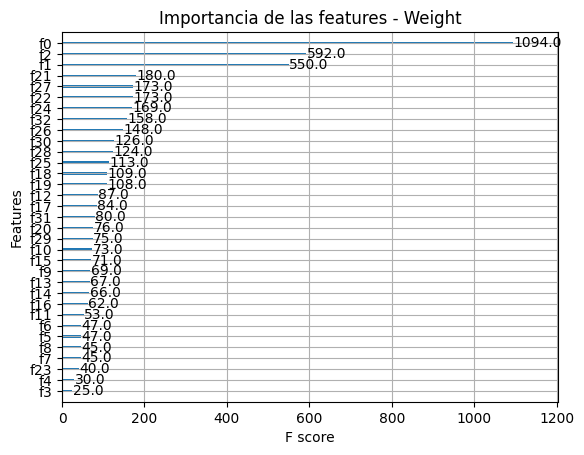

<Figure size 1000x800 with 0 Axes>

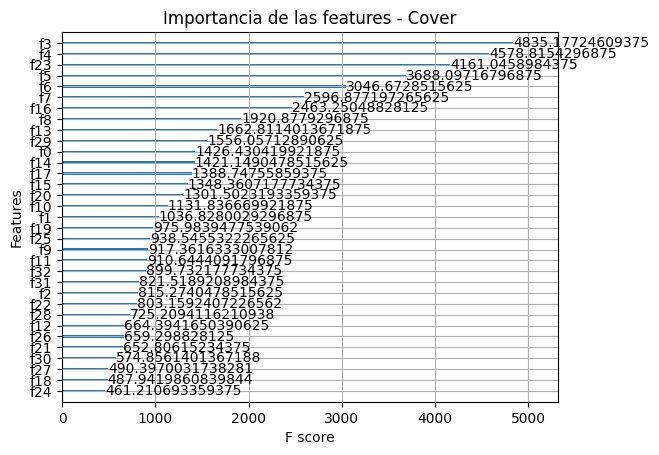

<Figure size 1000x800 with 0 Axes>

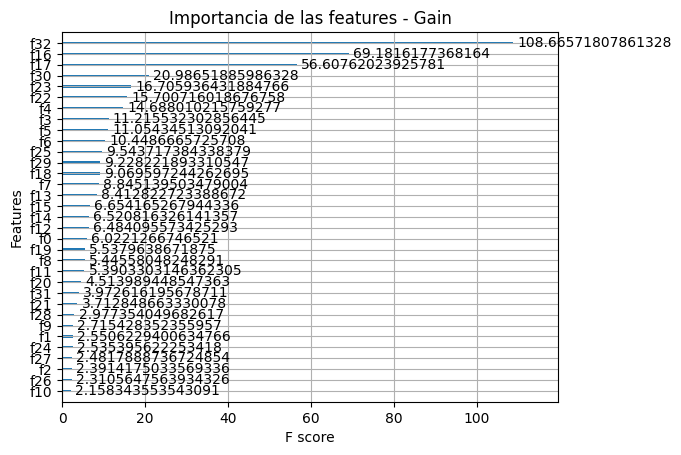

In [7]:
# Inserte su código aquí
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt


classifier = pipeline.named_steps['classifier']
# Visualizar la importancia usando el método 'weight'
plt.figure(figsize=(20, 16))
xgb.plot_importance(classifier, importance_type='weight')
plt.title('Importancia de las features - Weight')
plt.show()

# Visualizar la importancia usando el método 'cover'
plt.figure(figsize=(10, 8))
xgb.plot_importance(classifier, importance_type='cover')
plt.title('Importancia de las features - Cover')
plt.show()

# Visualizar la importancia usando el método 'gain'
plt.figure(figsize=(10, 8))
xgb.plot_importance(classifier, importance_type='gain')
plt.title('Importancia de las features - Gain')
plt.show()

# Más arriba puse que es cada fxx

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy del modelo base: 0.7475776221797864
Desviación estándar de las métricas después de la permutación: 0.002014729046961073


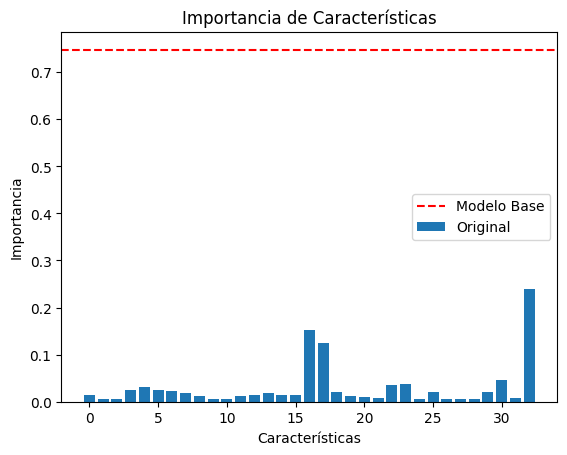

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Lo hacemos a mano la categorizacion, a traves de un print anterior de todos los valores unicos por columna distinguimos aquellos que son numericos y categoricos
numeric_features = ['BMI', 'MentHlth','PhysHlth']
categorical_features_listas = ['Sex','HighChol',	'CholCheck',	'Smoker'	,'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies'	,'HvyAlcoholConsump'		,'DiffWalk'	,'Stroke'	,'HighBP']
categorical_features = ['Age','GenHlth']
#print(categorical_features)


# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('c2', OneHotEncoder(), categorical_features),
        ('c1', 'passthrough', categorical_features_listas)
        
    ]
      # Conserva las características no especificadas)
)

# Crear el pipeline con el preprocesador y el clasificador XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo (incluida la división de datos)
pipeline.fit(X_train, y_train)


# Probamos el modelo

from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Entrenar el modelo base
pipeline.fit(X_train, y_train)

# Evaluar el modelo base
base_score = accuracy_score(y_test, pipeline.predict(X_test))
print("Accuracy del modelo base:", base_score)

# Número de iteraciones para permutación
num_iterations = 30
permuted_scores = []


# Realizar permutación y evaluar el modelo varias veces
for i in range(num_iterations):
    # Obtener el nombre de la primera característica
    feature_to_permute = numeric_features[0]

    # Crear una copia del DataFrame para no modificar el original
    permuted_X_test = X_test.copy()

    # Permutar los valores de la primera característica
    permuted_X_test[feature_to_permute] = np.random.permutation(permuted_X_test[feature_to_permute].values)

    # Copiar el modelo para no modificar el modelo base
    permuted_pipeline = pipeline.named_steps['classifier'].__class__(**pipeline.named_steps['classifier'].get_params())

    # Entrenar el modelo después de la permutación
    permuted_pipeline.fit(X_train, y_train)

    # Evaluar el modelo después de la permutación
    permuted_score = accuracy_score(y_test, permuted_pipeline.predict(permuted_X_test))
    permuted_scores.append(permuted_score)


# Calcular la desviación estándar de los resultados de la permutación
std_deviation = np.std(permuted_scores)
print("Desviación estándar de las métricas después de la permutación:", std_deviation)

# Visualizar la importancia de las características
# Asumo que tu modelo está dentro del preprocesador en el pipeline
classifier = pipeline.named_steps['classifier']

# Obtener la importancia de las características
feature_importances = classifier.feature_importances_

# Crear un gráfico de barras
plt.bar(range(len(feature_importances)), feature_importances, label='Original')
plt.axhline(y=base_score, color='r', linestyle='--', label='Modelo Base')
plt.title('Importancia de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.legend()
plt.show()

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy del modelo base: 0.7475776221797864
Desviación estándar de las métricas después de la permutación: 0.0026380763626300116


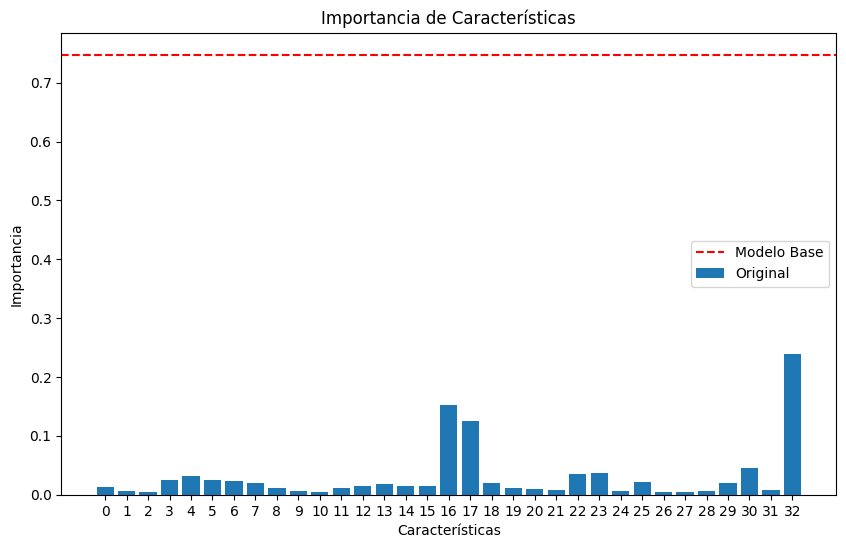

In [9]:
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Lo hacemos a mano la categorizacion, a traves de un print anterior de todos los valores unicos por columna distinguimos aquellos que son numericos y categoricos
numeric_features = ['BMI', 'MentHlth','PhysHlth']
categorical_features_listas = ['Sex','HighChol',	'CholCheck',	'Smoker'	,'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies'	,'HvyAlcoholConsump'		,'DiffWalk'	,'Stroke'	,'HighBP']
categorical_features = ['Age','GenHlth']
#print(categorical_features)


# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('c2', OneHotEncoder(), categorical_features),
        ('c1', 'passthrough', categorical_features_listas)
        
    ]
      # Conserva las características no especificadas)
)

# Crear el pipeline con el preprocesador y el clasificador XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo (incluida la división de datos)
pipeline.fit(X_train, y_train)


# Probamos el modelo

from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Entrenar el modelo base
pipeline.fit(X_train, y_train)

# Evaluar el modelo base
base_score = accuracy_score(y_test, pipeline.predict(X_test))
print("Accuracy del modelo base:", base_score)

# Número de iteraciones para permutación
num_iterations = 30
permuted_scores = []


# Realizar permutación y evaluar el modelo varias veces
for i in range(num_iterations):
    # Obtener el nombre de la primera característica
    feature_to_permute = numeric_features[0]

    # Crear una copia del DataFrame para no modificar el original
    permuted_X_test = X_test.copy()

    # Permutar los valores de la primera característica
    permuted_X_test[feature_to_permute] = np.random.permutation(permuted_X_test[feature_to_permute].values)

    # Copiar el modelo para no modificar el modelo base
    permuted_pipeline = pipeline.named_steps['classifier'].__class__(**pipeline.named_steps['classifier'].get_params())

    # Entrenar el modelo después de la permutación
    permuted_pipeline.fit(X_train, y_train)

    # Evaluar el modelo después de la permutación
    permuted_score = accuracy_score(y_test, permuted_pipeline.predict(permuted_X_test))
    permuted_scores.append(permuted_score)


# Calcular la desviación estándar de los resultados de la permutación
std_deviation = np.std(permuted_scores)
print("Desviación estándar de las métricas después de la permutación:", std_deviation)

# Visualizar la importancia de las características
# Asumo que tu modelo está dentro del preprocesador en el pipeline
classifier = pipeline.named_steps['classifier']

# Obtener la importancia de las características
feature_importances = classifier.feature_importances_

# Obtener el número correcto de características después del preprocesamiento
num_features_after_preprocessing = len(feature_importances)

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras
plt.bar(range(num_features_after_preprocessing), feature_importances, tick_label=np.arange(num_features_after_preprocessing), label='Original')

# Línea punteada para el modelo base
plt.axhline(y=base_score, color='r', linestyle='--', label='Modelo Base')

# Configuración del gráfico
plt.title('Importancia de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.legend()

# Mostrar el gráfico
plt.show()

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [10]:
!pip install shap

In [11]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [12]:

import shap

# Obtener el modelo XGBoost del pipeline
xgb_model = pipeline.named_steps['classifier']

# Crear un objeto explainer de SHAP con el modelo XGBoost y los datos de entrenamiento
explainer = shap.Explainer(xgb_model, X_train)

# Calcular los SHAP values para todo el conjunto de prueba
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Visualizar los SHAP values
#shap.summary_plot(shap_values, X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[01:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
 47%|=========           | 6627/14139 [00:21<00:23]       

: 

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [ ]:
# Inserte código para generar gráficos de aporte local aquí

# Seleccionar las instancias específicas
instancia_1 = 1
instancia_9 = 9
instancia_150 = 150

# Visualizar el aporte de las variables para la instancia 1
shap.force_plot(explainer.expected_value, shap_values[instancia_1, :], X_test.iloc[instancia_1, :])

# Visualizar el aporte de las variables para la instancia 9
shap.force_plot(explainer.expected_value, shap_values[instancia_9, :], X_test.iloc[instancia_9, :])

# Visualizar el aporte de las variables para la instancia 150
shap.force_plot(explainer.expected_value, shap_values[instancia_150, :], X_test.iloc[instancia_150, :])


### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [ ]:
# Inserte código para generar gráficos de aporte global aquí

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
# Inserte código para generar gráficos PDP aquí

: 

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

^C


In [ ]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>